In [1]:
## test
## 9/8/2021

In [1]:
import pandas as pd
import geopandas as gpd
from scipy.spatial import cKDTree


polygons = gpd.read_file('../../data/NYC_shapefiles/snapped_clustered_hex.shp') 

polygons = polygons.to_crs({'init':'epsg:4326'}) # lon,lat unit: feet to degree

polygons['CELL_ID']=polygons.index

/home/sguo/anaconda3/envs/geovisual/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [2]:
df1 = pd.read_csv('../../data/trips_on_day1.csv')

In [8]:
df1['origin_hid'].min()

2

<AxesSubplot:>

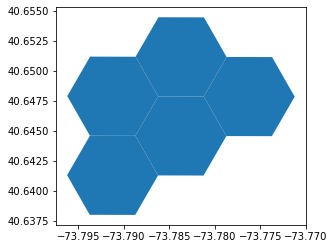

In [40]:
lists = df1.value_counts('origin_hid')[:200].index
polygons[(polygons['CELL_ID'].isin(lists))&(polygons['lon'].between(-73.80,-73.75))&(polygons['lat'].between(40.63,40.67))].plot()

In [27]:
polygons

,Id,GRID_ID,lat,lon,id_1,cluster_la,tagged_lat,tagged_lon,col_id,row_id,snap_lat,snap_lon,geometry,CELL_ID
0,0,AU-55,40.5623,-73.9113,3,0,40.562281,-73.911379,17,53,40.562281,-73.911379,"POLYGON ((-73.90630 40.56230, -73.90881 40.559...",0
1,0,AZ-55,40.5656,-73.8738,1,2,40.565813,-73.873166,22,53,40.565813,-73.873166,"POLYGON ((-73.86885 40.56556, -73.87136 40.562...",1
2,0,AJ-54,40.5722,-73.9937,68,0,40.572204,-73.993668,6,52,40.572204,-73.993668,"POLYGON ((-73.98868 40.57223, -73.99118 40.568...",2
3,0,AL-54,40.5722,-73.9787,135,0,40.573567,-73.978102,8,52,40.573567,-73.978102,"POLYGON ((-73.97370 40.57222, -73.97620 40.568...",3
4,0,AH-53,40.5788,-74.0087,7,0,40.578863,-74.008854,4,51,40.578863,-74.008854,"POLYGON ((-74.00366 40.57882, -74.00616 40.575...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0,AY-3,40.9052,-73.8807,2,1,40.906585,-73.879998,21,1,40.906585,-73.879998,"POLYGON ((-73.87571 40.90521, -73.87823 40.901...",1342
1343,0,BC-3,40.9052,-73.8506,14,1,40.905131,-73.850414,25,1,40.905131,-73.850414,"POLYGON ((-73.84560 40.90518, -73.84812 40.901...",1343
1344,0,AU-2,40.9118,-73.9108,2,1,40.911770,-73.910511,17,0,40.911770,-73.910511,"POLYGON ((-73.90581 40.91184, -73.90833 40.908...",1344
1345,0,AV-2,40.9151,-73.9033,6,1,40.915153,-73.903571,18,0,40.915153,-73.903571,"POLYGON ((-73.89828 40.91513, -73.90079 40.911...",1345


Int64Index([ 908,  824,  826,  907,  866,  784,  825,  867,  906, 1011,  864,
             909,  946,  865,  947,  979,  783,  743,  943,  945,  782,  785,
             744, 1008,  663,  976,  990,  978,  742,  868,  702,  980,  701,
             944,  975, 1038,  823, 1058,  703, 1012,  664,  662,  622,  959,
             621,  905, 1036,  741,  544,  781,  827,  745,  948, 1035,  583,
             661,  238,  700,  704, 1071,  904,  582, 1070, 1007,  863,  624,
             237, 1085, 1084,  269,  469, 1059,  267, 1039,  822,  431, 1082,
             507,  942, 1037, 1009,  623, 1100, 1073,  991, 1083,  584,  547,
             683,  786, 1062, 1072, 1183,  668,  797, 1074, 1102,  665,  429,
            1061],
           dtype='int64', name='origin_hid')


<AxesSubplot:>

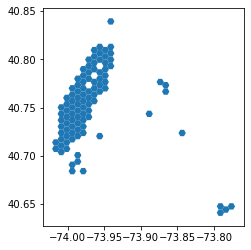

In [26]:

print(lists)
polygons[polygons['CELL_ID'].isin(lists)].plot()

<AxesSubplot:>

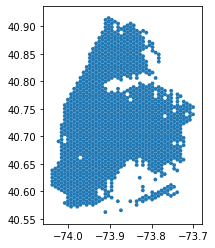

In [4]:
polygons.plot()

In [5]:
from sklearn.cluster import KMeans

In [28]:
m = KMeans(n_clusters=40, random_state=0)
mfit = m.fit(polygons[['lat','lon']])
polygons['labels'] = mfit.labels_

array([[<AxesSubplot:title={'center':'labels'}>]], dtype=object)

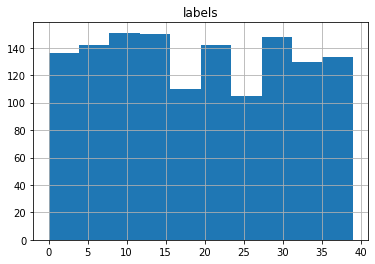

In [29]:
polygons.hist('labels')

<AxesSubplot:>

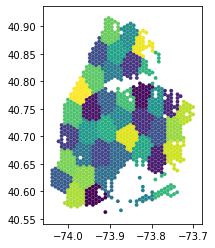

In [30]:
polygons.plot('labels')

In [34]:
polygons.to_file('../../data/NYC_shapefiles/labeled_clustered_hex.shp')